In [1]:
import cv2
import numpy as np
from IPython.display import Image, display
from matplotlib import pyplot as plt

In [2]:
!wget https://docs.opencv.org/4.x/water_coins.jpg

--2024-12-26 05:16:32--  https://docs.opencv.org/4.x/water_coins.jpg
Resolving docs.opencv.org (docs.opencv.org)... 104.26.14.224, 172.67.72.85, 104.26.15.224, ...
Connecting to docs.opencv.org (docs.opencv.org)|104.26.14.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15451 (15K) [image/jpeg]
Saving to: ‘water_coins.jpg’

water_coins.jpg     100%[===================>]  15.09K  --.-KB/s    in 0s      

2024-12-26 05:16:32 (45.5 MB/s) - ‘water_coins.jpg’ saved [15451/15451]



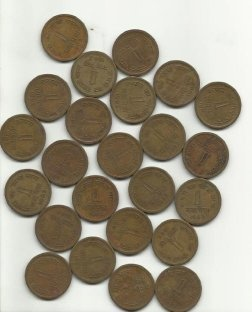

In [3]:
# Plot the image
def imshow(img, ax=None):
	if ax is None:
		ret, encoded = cv2.imencode(".jpg", img)
		display(Image(encoded))
	else:
		ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
		ax.axis('off')

#Image loading
img = cv2.imread("water_coins.jpg")
# Show image
imshow(img)

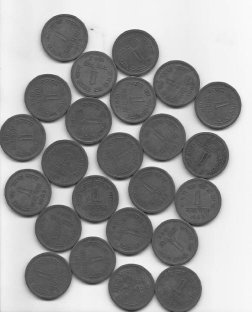

In [4]:
#image grayscale conversion
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow(gray)

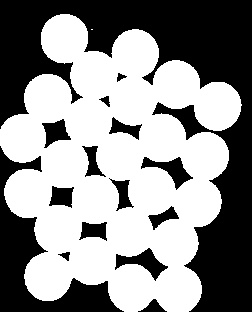

In [5]:
#Threshold Processing
ret, bin_img = cv2.threshold(gray,
							0, 255,
							cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
imshow(bin_img)

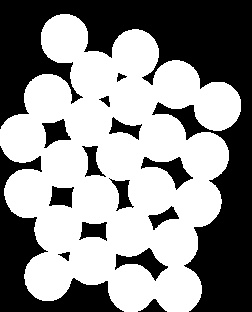

In [6]:
# noise removal
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
bin_img = cv2.morphologyEx(bin_img,
						cv2.MORPH_OPEN,
						kernel,
						iterations=2)
imshow(bin_img)

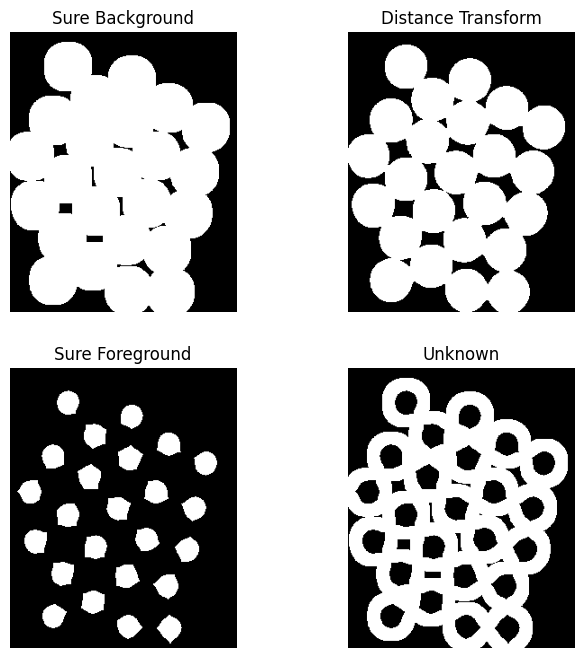

In [7]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
# sure background area
sure_bg = cv2.dilate(bin_img, kernel, iterations=3)
imshow(sure_bg, axes[0,0])
axes[0, 0].set_title('Sure Background')

# Distance transform
dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 5)
imshow(dist, axes[0,1])
axes[0, 1].set_title('Distance Transform')

#foreground area
ret, sure_fg = cv2.threshold(dist, 0.5 * dist.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)
imshow(sure_fg, axes[1,0])
axes[1, 0].set_title('Sure Foreground')

# unknown area
unknown = cv2.subtract(sure_bg, sure_fg)
imshow(unknown, axes[1,1])
axes[1, 1].set_title('Unknown')

plt.show()

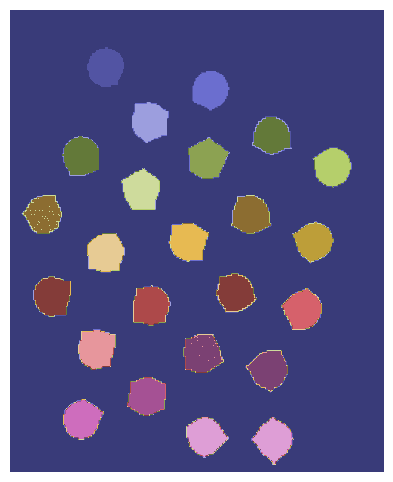

In [8]:
# Marker labelling
# sure foreground
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that background is not 0, but 1
markers += 1
# mark the region of unknown with zero
markers[unknown == 255] = 0

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()

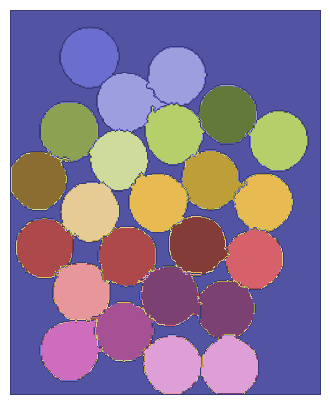

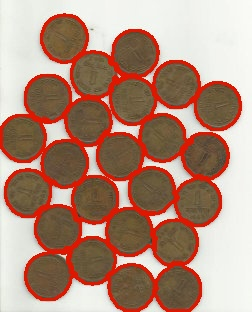

In [9]:
# watershed Algorithm
markers = cv2.watershed(img, markers)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()


labels = np.unique(markers)

coins = []
for label in labels[2:]:

# Create a binary image in which only the area of the label is in the foreground
#and the rest of the image is in the background
	target = np.where(markers == label, 255, 0).astype(np.uint8)

# Perform contour extraction on the created binary image
	contours, hierarchy = cv2.findContours(
		target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
	)
	coins.append(contours[0])

# Draw the outline
img = cv2.drawContours(img, coins, -1, color=(0, 23, 223), thickness=2)
imshow(img)

percobaan kedua

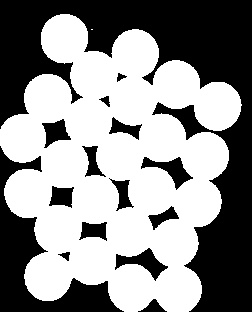

In [12]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('water_coins.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
imshow(thresh)

In [15]:
# noise removal
kernel = np.ones((3,3),np.uint8)
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

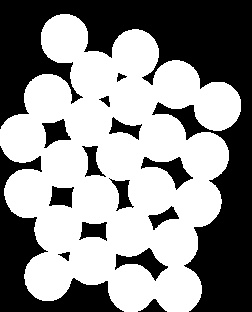

In [16]:
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
imshow(opening)

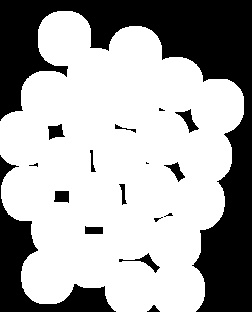

In [17]:
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
imshow(sure_bg)

In [23]:
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
dist_transform

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

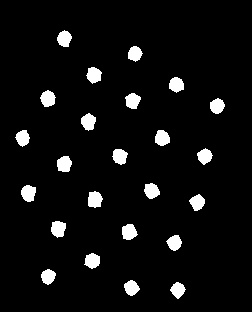

In [19]:
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
imshow(sure_fg)

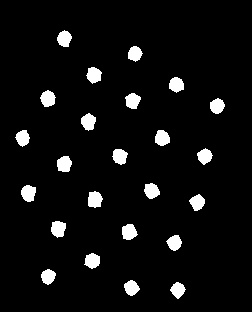

In [20]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
imshow(sure_fg)

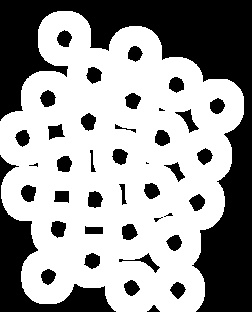

In [21]:
unknown = cv.subtract(sure_bg,sure_fg)
imshow(unknown)

In [26]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [28]:
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

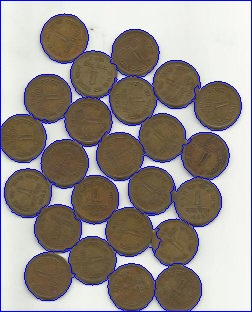

In [29]:
imshow(img)